# Data Diri

- Nama : Faisal Ahmad Gifari
- Jenis Kelamin : Laki-Laki
- Pekerjaaan : Mahasiswa
- Tempat/Tanggal Lahir : Kuningan, 17 September 2002
- Username : faisal_ag_037
- email : pd-20379543@edu.jakarta.go.id
- No. Telepon : 085775063559
- Kota Domisili : Jakarta Barat
- Institusi : UIN Syarif Hidayatullah Jakarta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library dan Datasets

In [2]:
import pandas as pd
import re
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
data = pd.read_csv("//content//drive//MyDrive//Datasets//complaints_processed.csv", converters={'reviews.text' : str})

In [4]:
data.narrative = data.narrative.astype(str)

In [5]:
data = data.dropna()

In [6]:
data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [7]:
data['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

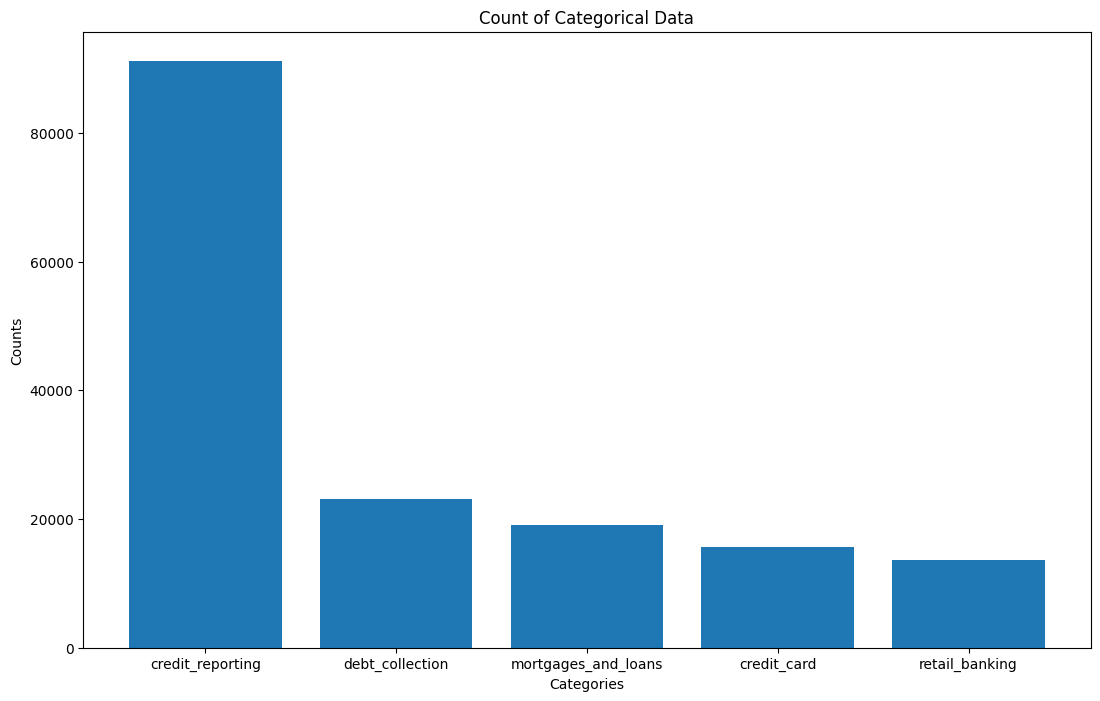

In [8]:
categories =data['product'].value_counts().index
counts = data['product'].value_counts().values

plt.figure(figsize=(13, 8))
plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Count of Categorical Data')
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162421 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


# Data Preprocessing

In [10]:
values_to_drop = ['credit_card', 'retail_banking']

for value in values_to_drop:
  index_rows = data[data['product'] == value].index
  data.drop(index_rows, inplace=True)

In [11]:
data = data.groupby('product').apply(lambda x: x.sample(min(len(x), 190000))).reset_index(drop=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133319 entries, 0 to 133318
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  133319 non-null  int64 
 1   product     133319 non-null  object
 2   narrative   133319 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


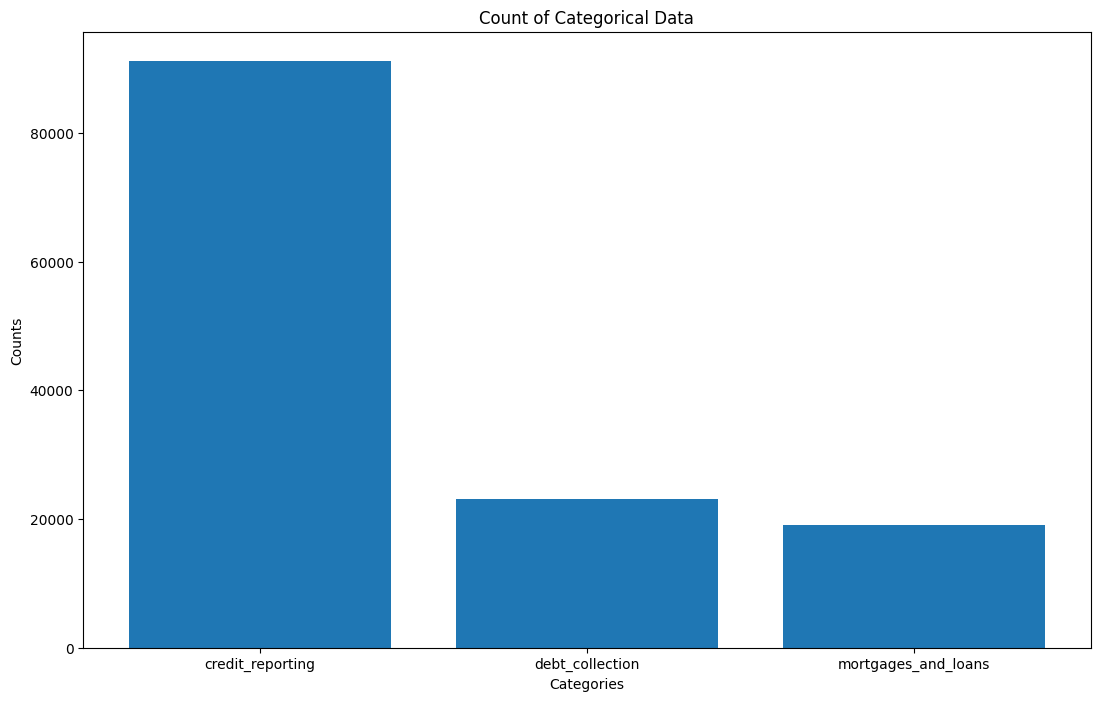

In [13]:
categories =data['product'].value_counts().index
counts = data['product'].value_counts().values

plt.figure(figsize=(13, 8))
plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Count of Categorical Data')
plt.show()

In [14]:
data = data.sample(frac=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133319 entries, 13935 to 111635
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  133319 non-null  int64 
 1   product     133319 non-null  object
 2   narrative   133319 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [16]:
data

,Unnamed: 0,product,narrative
13935,80774,credit_reporting,checking recent credit report noticed multiple...
118129,26474,mortgages_and_loans,home point financial located texas refuse give...
58190,101411,credit_reporting,personal information incorrect please remove a...
64203,87768,credit_reporting,company bought new service provider job shortl...
36306,73039,credit_reporting,recently looked credit report noticed thing be...
...,...,...,...
127585,115208,mortgages_and_loans,filed unified home loan application mortgage l...
106376,116070,debt_collection,seen provider upon receipt bill later year not...
82868,101684,credit_reporting,sister informed received letter mail home addr...
87109,160137,credit_reporting,tx tx fraudulent application submitted name id...


In [17]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
data

,product,narrative
13935,credit_reporting,checking recent credit report noticed multiple...
118129,mortgages_and_loans,home point financial located texas refuse give...
58190,credit_reporting,personal information incorrect please remove a...
64203,credit_reporting,company bought new service provider job shortl...
36306,credit_reporting,recently looked credit report noticed thing be...
...,...,...
127585,mortgages_and_loans,filed unified home loan application mortgage l...
106376,debt_collection,seen provider upon receipt bill later year not...
82868,credit_reporting,sister informed received letter mail home addr...
87109,credit_reporting,tx tx fraudulent application submitted name id...


In [19]:
label = data['product'].values

In [20]:
label

array(['credit_reporting', 'mortgages_and_loans', 'credit_reporting', ...,
       'credit_reporting', 'credit_reporting', 'debt_collection'],
      dtype=object)

In [21]:
narrative = data[['narrative']].copy()

In [22]:
narrative

,narrative
13935,checking recent credit report noticed multiple...
118129,home point financial located texas refuse give...
58190,personal information incorrect please remove a...
64203,company bought new service provider job shortl...
36306,recently looked credit report noticed thing be...
...,...
127585,filed unified home loan application mortgage l...
106376,seen provider upon receipt bill later year not...
82868,sister informed received letter mail home addr...
87109,tx tx fraudulent application submitted name id...


In [23]:
nltk.download('wordnet')
def lemmatization(text):
    lm = WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text
narrative['narrative'] = narrative['narrative'].apply(lemmatization)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
narrative.head()

,narrative
13935,check recent credit report notice multiple inq...
118129,home point financial locate texas refuse give ...
58190,personal information incorrect please remove a...
64203,company buy new service provider job shortly r...
36306,recently look credit report notice thing belie...


In [25]:
narrative

,narrative
13935,check recent credit report notice multiple inq...
118129,home point financial locate texas refuse give ...
58190,personal information incorrect please remove a...
64203,company buy new service provider job shortly r...
36306,recently look credit report notice thing belie...
...,...
127585,file unify home loan application mortgage lend...
106376,see provider upon receipt bill later year noti...
82868,sister inform receive letter mail home address...
87109,tx tx fraudulent application submit name ident...


In [26]:
# Download the stopwords from NLTK
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(text)

    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]

    return " ".join(filtered_text)

narrative['narrative'] = narrative['narrative'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
narrative.head()

,narrative
13935,check recent credit report notice multiple inq...
118129,home point financial locate texas refuse give ...
58190,personal information incorrect please remove a...
64203,company buy new service provider job shortly r...
36306,recently look credit report notice thing belie...


In [28]:
narrative

,narrative
13935,check recent credit report notice multiple inq...
118129,home point financial locate texas refuse give ...
58190,personal information incorrect please remove a...
64203,company buy new service provider job shortly r...
36306,recently look credit report notice thing belie...
...,...
127585,file unify home loan application mortgage lend...
106376,see provider upon receipt bill later year noti...
82868,sister inform receive letter mail home address...
87109,tx tx fraudulent application submit name ident...


In [29]:
narrative_array = narrative['narrative'].values

In [30]:
narrative_array

array(['check recent credit report notice multiple inquiry different bank idea authorize bank run credit put inquiry credit report',
       'home point financial locate texas refuse give credit receive loan payoff amount acknowledge apply instead claim fact receive give credit payoff payment date fictitious date change cause incur additional fee amount roughly documentary evidence home point financial receive payoff payment',
       'personal information incorrect please remove address credit file except one thats government issue state id attach others never physically reside see attach',
       ...,
       'sister inform receive letter mail home address never live state owe debt child support never put child support little investigate tell someone give name social security number claim money every month wrong person decide pull credit report show exact thing several account open name account mine please remove fraudulent item credit report',
       'tx tx fraudulent application submi

bahaya


In [31]:
nar_train, nar_test, label_train, label_test = train_test_split(narrative_array, label, test_size=0.2)

In [32]:
print(f"Jumlah data pada training set: {len(nar_train)}")
print(f"Jumlah data pada test set: {len(nar_test)}")

Jumlah data pada training set: 106655
Jumlah data pada test set: 26664


In [33]:
nar_train

array(['dispute bankruptcy credit report could verify delete credit report experian delete inaccurate outdated information unverifiable send electronic admission state verify wet signature verify info verify courthouse show credit report court house say specifically share information party party ask bankruptcy delete experian start dispute',
       'alert substantial change credit report read late payment credit card set automatic payment attempt resolve issue directly refuse change report contact credit report agency resolve issue include copy credit card statement reflect payment make bank withdrawal along letter complaint three bureau correct mistake contact xxxxxxxx open another dispute speak representative confirm miss payment record open dispute remove receive letter date state inaccurately report information change report account copy reflect payment deduct bank account onxxxx credit statement show payment receive additionally copy show payment deduct account credit card stateme

In [34]:
nar_test

array(['account open date amount call also file ftc report tell longer info fcpa section violation mislead false report like remove account american adjustment open date amount account also fraud ftc report account amount open date account mine well others',
       'apply home loan realtor tell credit par carefully review credit report realize victim identity theft honestly know familiar credit sure information obtain really frustrate know direction turn loan officer tell try file dispute credit bureau also along please help',
       'company report negative invalid information credit report severely affect credit score account information company provide prove original sign document say owe debt direct violation civil right accord fcra section company must remove account credit report immediately permanently deletion account credit report fair resolution please advise request validation verification item report original agency receive response indicate prove service service charge cos

In [35]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(nar_train)

In [36]:
sequences_train = tokenizer.texts_to_sequences(nar_train)
sequences_test = tokenizer.texts_to_sequences(nar_test)

In [37]:
padded_train = pad_sequences(sequences_train)
padded_test = pad_sequences(sequences_test)

In [38]:
label_train = pd.get_dummies(label_train, columns=['product'])

In [39]:
label_train

,credit_reporting,debt_collection,mortgages_and_loans
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
106650,1,0,0
106651,1,0,0
106652,0,1,0
106653,1,0,0


In [40]:
label_test = pd.get_dummies(label_test, columns=['product'])

In [41]:
label_test

,credit_reporting,debt_collection,mortgages_and_loans
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
26659,1,0,0
26660,1,0,0
26661,1,0,0
26662,1,0,0


In [42]:
 print(len(tokenizer.index_word) + 1 )

29301


# Training

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = len(tokenizer.index_word), output_dim=16),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax',)
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          468800    
                                                                 
 lstm (LSTM)                 (None, 256)               279552    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [45]:
class EarlyStopper(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.901 and logs.get('val_accuracy')>0.901):
      print("Accuracy dan Val Accuracy sudah sama-sama mencapai 90%")
      self.model.stop_training = True


In [46]:
EarlyStopper1 = EarlyStopper()

In [47]:
class TrainingPlot(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))

        if len(self.losses) > 1:

            N = np.arange(0, len(self.losses))

            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()
            plt.close()

In [48]:
TrainingPlot1 = TrainingPlot()

Epoch 1/50
3333/3333 - 503s - loss: 0.4611 - accuracy: 0.8270 - val_loss: 0.3333 - val_accuracy: 0.8875 - 503s/epoch - 151ms/step
Epoch 2/50


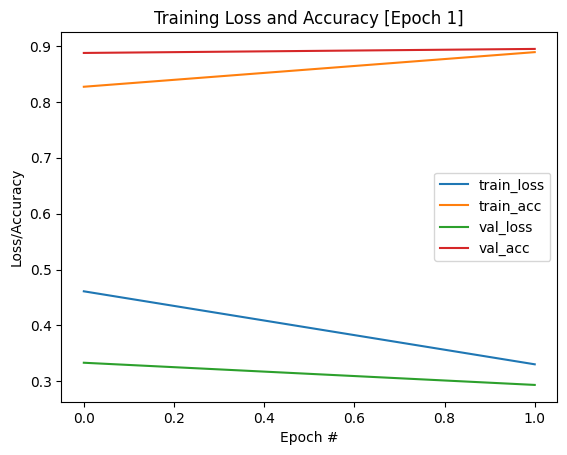

3333/3333 - 412s - loss: 0.3305 - accuracy: 0.8890 - val_loss: 0.2936 - val_accuracy: 0.8947 - 412s/epoch - 124ms/step
Epoch 3/50


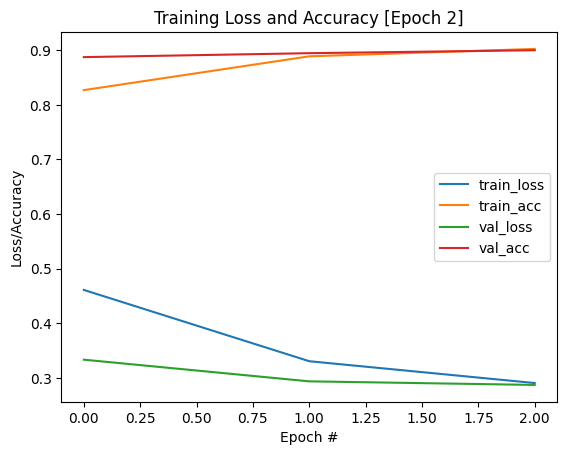

3333/3333 - 413s - loss: 0.2905 - accuracy: 0.9025 - val_loss: 0.2871 - val_accuracy: 0.9001 - 413s/epoch - 124ms/step
Epoch 4/50


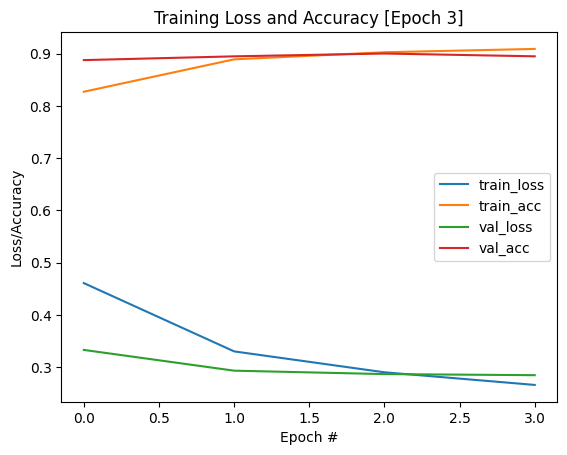

3333/3333 - 409s - loss: 0.2664 - accuracy: 0.9089 - val_loss: 0.2850 - val_accuracy: 0.8948 - 409s/epoch - 123ms/step
Epoch 5/50


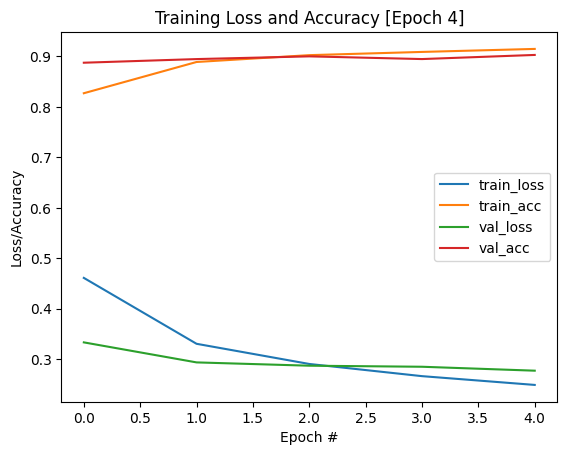

Accuracy dan Val Accuracy sudah sama-sama mencapai 90%
3333/3333 - 408s - loss: 0.2490 - accuracy: 0.9149 - val_loss: 0.2772 - val_accuracy: 0.9029 - 408s/epoch - 122ms/step


In [49]:
num_epochs = 50
history = model.fit(padded_train,
                    label_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks = [TrainingPlot1, EarlyStopper1]
                    )

Model berhasil mendapatkan hasil accuracy dan validation accuracy sebesar lebih dari 90% untuk 3 kelas dari sebuah dataset